<a href="https://colab.research.google.com/github/DechiWords/Simulation/blob/main/Analisis_Estadistico_En_Simulacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#ACTUALIZAMOS LAS LIBRERIAS ANTES DE TRABAJAR EN ESTE CUADERNO
!pip install scipy --upgrade
!pip install math --upgrade
!pip install statistics --upgrade
!pip install matplotlib --upgrade
!pip install numpy --upgrade
!pip install pandas --upgrade

Requirement already up-to-date: scipy in /usr/local/lib/python3.7/dist-packages (1.6.3)
ERROR: Could not find a version that satisfies the requirement math (from versions: none)
ERROR: No matching distribution found for math
Requirement already up-to-date: statistics in /usr/local/lib/python3.7/dist-packages (1.0.3.5)
Requirement already up-to-date: matplotlib in /usr/local/lib/python3.7/dist-packages (3.4.2)
Requirement already up-to-date: numpy in /usr/local/lib/python3.7/dist-packages (1.20.2)
Requirement already up-to-date: pandas in /usr/local/lib/python3.7/dist-packages (1.2.4)


Por lo general, los estudios de simulación se realizan para determinar el valor de cierta cantidad $\theta$ relacionada con un modelo estocástico particular. Una simulación del sistema en cuestión produce los datos de salida $X$, una variable aleatoria cuyo valor esperado es la cantidad de
interés $\theta$.

Una simulación independiente (es decir otra ejecución de la simulación) proporciona una nueva variable aleatoria independiente de la anterior, con media $\theta$. Esto continúa hasta un total de $k$ ejecuciones y $k$ variables aleatorias independientes $X_1,\ldots,X_k$, todas con la misma distribución y media $\theta$.

El promedio de estos $k$ valores se puede aproximar mediante el estimador de $\theta$ de la forma

$$\bar{X} = \sum_{i=1}^{k}\frac{X_i}{k}$$



Después de obtener las observaciones de una variable aleatoria, por algún método de simulación, se debe efectuar una validación estadística, con el fin de estudiar la diferencia entre la aproximación calculada con las observaciones y la medida teórica de interés.

#Estimadores medio y varianza muestral

Dadas $X_1,\ldots,X_k$ simulaciones de $X$, donde su media y varianza son $\theta = E[X]$ y $\sigma^2 = Var[X] < \infty$. La cantidad

$$\bar{X} = \sum_{i=1}^{k}\frac{X_i}{k}$$

Es la media muestra; Cuando no se conoce la media $\theta$ poblacional, con frecuencia se toma la media muestral para estimarla.

**DEMOSTRACIÓN $\bar{X}$ ES UN ESTIMADOR INSESGADO DE $\theta$**

Sabemos que $E[X_i] = \theta$. Tenemos que

$$E[\bar{X}] = E\left[\sum_{i=1}^{k}\frac{X_i}{k}\right] = \sum_{i = 1}^k\frac{1}{k}E[X_i] = \frac{k\theta}{k}=\theta \hspace{10pt}_{_\blacksquare}$$

Se tiene que $\bar{X}$ es un estimador insesgado de $\theta$.

**DEMOSTRACIÓN $\bar{X}$ TIENE VARIANZA $\frac{\sigma^2}{k}$**

Partimos de la definición de varianza.

$$E\left[\left(\bar{X}-\theta\right)^2 \right] = Var\left(\bar{X}\right) = Var\left(\sum_{i=1}^k\frac{X_i}{k}\right)$$

$$\implies Var\left(\bar{X}\right) = \frac{\sigma^2}{k}\hspace{10pt}_{_\blacksquare}$$

Así tenemos que $\bar{X}$, media muestral, de los $k$ valores $X_1,\ldots,X_n$ es una variable aleatoria con media $\theta$ y varianza $\frac{\sigma^2}{k}$.

Es común que el valor de $\sigma^2$ sea desconocida, por ello consideramos el estimador

$$S^2_k = \frac{1}{k-1}\sum_{i=1}^k\left(X_i-\bar{X}\right)^2$$

El cual es un estimador insesgado de $\sigma^2$ y es conocido como la desviación muestral.

#Determinación del número de simulaciones

En Teoría de la Probabilidad, para evaluar el comportamiento de una variable aleatoria, con varianza finita, al rededor de su media, se utiliza el siguiente resultado, que se conoce como la desigualdad de Markov

$$P\{h(X)\geq\varepsilon\}\leq \frac{E\left[h(X)\right]}{\varepsilon}, \forall \varepsilon > 0$$

Siempre que $h(x)$ sea una función no negativa.

Entonces para todo $k>0$ aplicando la desigualdad para $\varepsilon = \frac{c^2\sigma^2}{k}$ y $h\left(\bar{X}_k\right) = \left(\bar{X}_k-\sigma^2\right)$ se obtiene el siguiente resultado, conocido como desigualdad de Tchevichev

$$P\left\{\left|\bar{X}-\theta\right|\geq \frac{c\sigma}{\sqrt{k}}\right\} \leq \frac{1}{c^2}, \forall c > 0$$

**Directamente, la forma de establecer el número de simulaciones para ajustar la cercanía entre la media poblacional y muestral, a partir de esta relación, consiste en seleccionar $k$, siempre que $k>100$, para que la probabilidad de alejamiento $\frac{1}{c^2}$, sea suficientemente pequeña, pero manteniendo el radio $\frac{c\sigma}{\sqrt{k}}$**.

#Intervalo de confianza para la media

Suponga que $X_1,\ldots,X_k$ son variables aleatorias independientes con una distribución común, con media $\theta$ y varianza $\sigma^2$. 

Aunque la media muestral $\bar{X} = \sum_{i=1}^k\frac{X_i}{k}$ es un estimador eficaz de $\theta$, no esperamos que $\bar{X}$ sea igual a $\theta$, sino que sea «cercano».

A veces es más útil especificar un intervalo para el cual tenemos cierto grado de confianza de que $\theta$ esté en él.

Cuando el valor de $k$ es grande.

El intervalo de confianza para la media poblacional con probabilidad $1-\alpha$, estará dentro de la región

$$\bar{X}_k \pm Z_{\frac{\alpha}{2}}\frac{S_k}{\sqrt{k}}$$

Cuando el valor de $k$ es pequeño.

En el caso de que $k$ sea pequeño el intervalo de confianza es $\bar{X}\pm t_{\frac{\alpha}{2}}\frac{S_k}{\sqrt{k}}$, sin embargo se comentó anteriormente que $k>100$ por lo cual la aproximación para el caso de Simulación debe ser dado con el cálculo de la normal.

In [ ]:
def Intervalo_Confianza (Data,Alpha):
  '''
  Data : Es una lista que contiene cada uno de los datos de salida de la simulacion realizada.

  Alpha : Es la probabilidad deseada a analizar. Es un valor entre 0 y 1. 

  Ejemplo : Si deseamos un intervalo de confianza del 90 % tenemos que 1-\alpha = 0.9 entonces \alpha = 0.1

            Data = [0.6567,0.1245,...,1.3425] #AL MENOS 100 ELEMENTOS
  '''
  from scipy.stats import norm
  from math import sqrt
  from statistics import mean, stdev
  Media, k, Z, Desviacion = mean(Data), len(Data), norm.isf(Alpha/2), stdev(Data)
  Izq, Der = Media - Z*(Desviacion/sqrt(k)), Media + Z*(Desviacion/sqrt(k))
  return [Izq,Der,str(Izq)[0:8]+' <M< '+str(Der)[0:8]]

# Técnicas de reducción de varianza

Partiendo de $X_1,\ldots, X_k$ simulaciones de $X$ y teniendo como objetivo la estimación de $\theta = E[X]$, si se utiliza $\hat{\theta}_k = \bar{X}_k$, se tiene que el estimador es centrado, $E[\hat{\theta}_k] = \theta$, con varianza

$$Var\left[\hat{\theta}_k \right] = \frac{Var[X]}{k}$$

Ahora veremos algunos procedimientos en los cuales, proporcionando estimaciones que en media coinciden con el valor a estimar, en algunos casos tienen un error de muestreo mucho menor.

## Variables antitéticas

La clave de este tratamiento consiste en **seleccionar las variables de forma que no sean independientes y seguir utilizando la media muestral**.

Suponga que estamos interesados en utilizar la simulación para estimar $\theta = E[X]$ y suponga que hemos generado $X_1,X_2$ variables aleatorias idénticamente distribuidas con media $\theta$.

$$\implies Var\left(\frac{X_1+X_2}{2} \right) = \frac{1}{4}[Var(X_1) + Var(X_2) + 2Cov(X_1,X_2)]$$

Por lo tanto sería bueno (en el sentido de que la varianza se reduce) que $X_1$ y $X_2$ estuvieran correlacionadas en forma negativa en vez de ser independientes.

Para lograr que $X_1$ y $X_2$ estén correlacionadas en forma negativas suponga que $X_1$ es una función de $m$ números aleatorios, es decir, suponga que

$$X_1 = h\left(U_1,\ldots,U_m\right)$$

Donde $U_i,i\in \{1,\ldots,m\},$ son números distribuidos de manera uniforme entre 0 y 1.

Ahora, sí $U$ es un número aleatorio distribuido uniformemente entre 0 y 1 entonces $1-U$ también lo está.

Por lo tanto

$$X_2 = h\left(1-U_1,\ldots,1-U_m\right)$$

tiene la misma distribución que $X_1$.

Además, como $1-U$ está correlacionada de manera negativa con $U$, esperaríamos que $X_2$ estuviese correlacionada de manera negativa con $X_1$.

Por lo tanto, en este caso, después de generar $U_1,\ldots,U_m$ para calcular $X_1$, en vez de generar un nuevo conjunto independiente de $m$ números aleatorios, podemos hacerlo utilizando solamente el conjunto $1-U_1,\ldots 1-U_m$ para calcular $X_2$.

**EJEMPLO**

Sea la variable aleatoria de interés $X = e^U$, donde $U$ es una variable aleatoria distribuida uniformemente entre 0 y 1, y supongamos que estamos interesados en realizar la simulación para estimar 

$$\theta = E[X] = E\left[e^U\right]$$

Por definición de la esperanza sabemos que

$$E\left[e^U\right] = \int_0^1e^x\cdot dx = e-1$$

Como $\theta = E\left[e^U\right]\implies \theta = e-1$

Considere $e^{U_1},e^{U_2}$, con $e^{U_1} = e^U, e^{U_2} = e^{1-U}$

Sí estas variables son números aleatorios independientes tenemos que

$$Var\left(\frac{U_1+U_2}{2}\right) = \frac{1}{4}\left[Var(U_1)+Var(U_2)+2Cov(U_1,U_2)\right]$$

Pero $Cov(U_1,U_2) = 0$ pues son independientes.

Entonces

$$Var\left(\frac{U_1+U_2}{2}\right) = \frac{1}{4}\left[Var(U_1)+Var(U_2)\right]$$

Notemos que 

$$Var(U_1) = E[U_1^2]-\left(E[U_1]\right)^2$$

Donde $E\left[U_1^2\right]=E\left[e^{2U} \right] = \int_0^1e^{2x}\cdot dx = \frac{1}{2}(e^2-1)$

$$\implies Var(U_1) = \frac{e^2-1}{2} - (e-1)^2$$

De manera análoga tenemos que

$$Var(U_2) = E\left[U_2^2\right]-\left(E\left[U_2\right]\right)^2$$

Donde $E[U_2] = \int_0^1e^{1-x}\cdot dx = e-1$ y $E\left[U_2^2\right] = \frac{e^2-1}{2}$

$$\implies Var(U_2) = E\left[U_2^2\right] - \left(E[U_2]\right)^2 = \frac{e^2-1}{2} - (e-1)^2$$

Notemos que $Var(U_1) = Var(U_2\implies Var(U_1)+Var(U_2) = 2Var(U_1)$

$$\implies Var\left(\frac{U_1+U_2}{2}\right) = \frac{1}{4}\left[Var(U_1)+Var(U_2)\right] = \frac{Var(U_1)}{2} = \frac{\frac{e^2-1}{2} - (e-1)^2}{2}$$

El valor anterior esta dado como

In [ ]:
from math import e
Var_Ind = ((((e**2)-1)/2)-((e-1)**2))/2
((((e**2)-1)/2)-((e-1)**2))/2

0.12101780372638271

Sí estas variables son antitéticas tenemos que

$$$$

$$Var\left(\frac{U_1+U_2}{2}\right) = \frac{1}{4}\left[Var(U_1)+Var(U_2)+2Cov(U_1,U_2)\right] = \frac{1}{4}[2Var(U_1)+2Cov(U_1,U_2)] = \frac{1}{2}[Var(U_1)+Cov(U_1,U_2)]$$

Donde 

$$Cov(U_1,U_2) = E[e^U\cdot e^{1-U}]-E[e^U]E[e^{1-U}]$$

$$\implies Cov(U_1,U_2) = e-(e-1)^2$$

Por lo tanto

$$Var\left(\frac{U_1+U_2}{2}\right) = \frac{\frac{e^2-1}{2} - (e-1)^2}{2} + \frac{e-(e-1)^2}{2}$$

El valor anterior mencionado esta dado como

In [ ]:
Var_Dep = (((((e**2)-1)/2)-((e-1)**2))/2) + ((e-((e-1)**2))/2)
(((((e**2)-1)/2)-((e-1)**2))/2) + ((e-((e-1)**2))/2)

0.003912496949625588

Podemos deducir el porcentaje que reducimos la varianza

In [ ]:
str(((Var_Ind-Var_Dep)/Var_Ind)*100)[:5]+'%'

'96.76%'

## Variables de control

Otra forma de reducir la varianza, se basa en la introducción de una variable de media conocida y si es posible, muy correlacionada con la variable propuesta. Así, mezclando con otro criterio, observaciones de una y otra, se puede disminuir también, la varianza de la media muestral.

De nuevo, suponga que queremos utilizar simulación para estimar $\theta = E[X]$, donde $X$ es la salida de la simulación. Suponga que se conoce el valor esperado de alguna otra variable de salida $Y$, digamos, $E[Y] = \mu_y$. Entonces, para cualquier constante $c$, la cantidad

$$X+c(Y-\mu_y)$$

También es un estimador insesgado de $\theta$. Para determinar el mejor valor de $c$, observe que

$$Var(X+c(Y-\mu_y)) = Var(X+cY) = Var(X) + c^2\cdot Var(Y) + 2c\cdot Cov(X,Y)$$

Lo anterior se minimiza cuando $c = c^{*}$, donde

$$c^{*} = -\frac{Cov(X,Y)}{Var(Y)}$$

Y para este valor la varianza del estimador es

$$Var(X+c^{*}(Y-\mu)) = Var(X) - \frac{[Cov(X,Y)]^2}{Var(Y)}$$

La cantidad $Y$ es una **variable de control** para el estimador de simulación $X$.

Al dividir la ecuación entre $Var(X)$, obtenemos

$$\frac{Var(X+c^{*}(Y-\mu))}{Var(X)} = 1 - \frac{[Cov(X,Y)]^2}{Var(X)Var(Y)}$$

Pero $$Corr^2(X,Y) = \frac{[Cov(X,Y)]^2}{Var(X)Var(Y)}$$

Entonces

$$Corr(X,Y) = \frac{Cov(X,Y)}{\sqrt{Var(X)Var(Y)}}$$

Es la correlación entre $X$ e $Y$.

Por lo tanto, la reducción de varianza obtenida al utilizar la variable de control $Y$ es de $100\cdot Corr^2(X,Y)\%$

Por lo general, las cantidades $Cov(X,Y)$ y $Var(X,Y)$ no se conocen de antemano y deben estimarse a partir de los datos simulados.

Si se realizan $n$ ejecuciones de simulación y se obtienen los datos de salida $X_i,Y_i, i = 1,\ldots, n$, entonces podemos utilizar los estimadores

$$\hat{Cov}(X,Y) = \sum_{i=1}^n\frac{(X_i-\bar{X})(Y_i-\bar{Y})}{(n-1)}$$

$$\hat{Var}(Y) = \sum_{i=1}^n\frac{\left(Y_i-\bar{Y}\right)^2}{n-1}$$

Para aproximar $c^{*}$ mediante $\hat{c}^{*}$

$$\hat{c}^{*} = - \sum_{i=1}^n\frac{(X_i-\bar{X})(Y_i-\bar{Y})}{\left(Y_i-\bar{Y}\right)^2}$$

La varianza del estimador controlado

$$Var(\bar{X}+c^{*}(\bar{Y}-\mu_y)) = \frac{1}{n}\left(Var(X) - \frac{Cov^2(X,Y)}{Var(Y)}\right)$$

Se puede estimar mediante el estimador de $Cov(X,Y)$ junto con los estimadores de la varianza muestral de $Var(X)$ y $Var(Y)$.

**EJEMPLO**

Supongamos que estamos interesados en realizar una simulación para estimar

$$\theta = E[e^u] = \int_0^1e^x\cdot dx$$

En este caso, una variable natural para utilizar como control es el número aleatorio distribuido uniformemente entre 0 y 1, $U$.

Nosotros calcularemos

$$Var(X+c^{*}(Y-\mu)) = Var(X) - \frac{\left[Cov(X,Y)\right]^2}{Var(Y)}$$

Donde $X = e^{U}$ y $U = Y$.

Note que $Var(e^{u}) = E\left[e^{U2}\right] - \left[E\left[e^{U}\right]\right]^2$

Tenemos que $E[e^{U}] = \int_0^1e^x\cdot dx = e-1$ y además que $E[e^{U2}] = \int_0^1e^{2x}\cdot dx = \frac{e^2-1}{2}$

Entonces tenemos que

$$Var(e^{U}) = \frac{e^2-1}{2}-(e-1)^2$$

Ahora, la $Cov(e^{U},U) = E[e^{U}U] - E[e^{U}]E[U]$

$$\implies Cov(e^{U},U) = \int_0^1xe^xdx-\left[\int_0^1xdx\right]\left[\int_0^1e^xdx\right]$$

$$\implies Cov(e^{U},U) = 1 - \frac{e-1}{2}$$

Por último, $Var(U) = E[U^2]-\left[E[U]\right]^2$

$$Var(U) = \int_0^1x^2dx - \left[\int_0^1xdx\right]^2$$

$$\implies Var(U) = \frac{1}{12}$$

Tenemos entonces que

$$\implies Var(e^U+c^{*}(U-\mu)) = Var(e^U) - \frac{\left[Cov(e^U,U)\right]^2}{Var(U)} = \left(\frac{e^2-1}{2}-(e-1)^2\right) - 12\left(1 - \frac{e-1}{2}\right)^2$$

Es decir que el valor de la varianza del estimador es 

In [ ]:
(1/2)*(-7*(e**2)-57+40*e)

0.0039402229236245034

Sabemos que la reducción de varianza obtenida al utilizar la variable de control $Y = U$ es de $100\cdot Corr^2(e^U,U)\%$

Donde 

$$Corr^2(e^U,U) = \frac{[Cov(e^U,U)]^2}{Var(e^U)Var(U)} = 12\frac{\left(1 - \frac{e-1}{2}\right)^2}{\left(\frac{e^2-1}{2}-(e-1)^2\right)} = 6 \frac{e-3}{1-e}$$

In [ ]:
str((6*((e-3)/(1-e)))*100)[:5]+'%'

'98.37%'

El uso de la variable de control $U$ puede conducir a una reducción de la varianza de hasta un $98.37\%$.

Recordando que 

$$c^{*} = - \frac{Cov(X,Y)}{Var(Y)} = - \frac{Cov(e^{U},U)}{Var(U)}=-12\left(1 - \frac{e-1}{2}\right) = -18+6e$$

In [ ]:
-18+e*6

-1.6903090292457286

## Muestreo por importancia

Sea $X = (X_1,\ldots,X_n)$ un vector de variables aleatorias con una función de densidad conjunta $f(x) = f(x_1,\ldots,x_n)$ y suponga que estamos interesados en estimar

$$\theta = E[h(x)] = \int h(x)f(x) dx$$

Para alguna función $h(x)$, pero resulta que la variable aleatoria $Y$, con función de densidad $g(x)$ sobre el mismo dominio, se puede simular más fácilmente, es posible recalcular

$$\theta = \int \frac{h(x)f(x)}{g(x)}g(x)dx$$

Y así el procedimiento consistirá en generar $Y_1,\ldots, Y_k$ observaciones de $Y$ y estimar $\theta$ mediante

$$\hat{\theta}_k = \frac{1}{k}\sum_{i=1}^k\frac{h(Y_i)f(Y_i)}{g(Y_i)}$$

Utilizando las simulaciones más accesibles, lo que conduce a una mejora en la eficacia del procedimiento.

Pero además, teniendo en cuenta que

$$Var\left(\hat{\theta}_k \right) = \frac{1}{k}Var\left(\frac{g(Y)f(Y)}{h(Y)} \right)$$

la selección de la función de densidad $g(x)$ (densidad de importacia) es absolutamente relevante, para conseguir una redicción del error de muestreo.

**EJEMPLO**

Sea $X$ una variable aleatoria $t_8$ de distribución $t-Student$, con la función de densidad $f_{t_8}(x)$.

Se puede obtener una aproximación de la integral

$$I =  \int_{2.1}^{\infty}x^5f_{t_8}(x)dx$$

1. Directamente simulaciones de una variable aleatoria $t$ con 8 grados de libertad

2. Mediante muestreo por importancia con :

* Cauchy con media 0 y varianza 1
* Normal con media 0 y varianza 1

In [ ]:
#DEFINIMOS LA FUNCION x^5f_t8(x)

def f_t (x):
  #IMPORTAMOS LA VARIABLE ALEATORIA t-Student
  from scipy.stats import t
  return (x**5)*t.pdf(x,8)

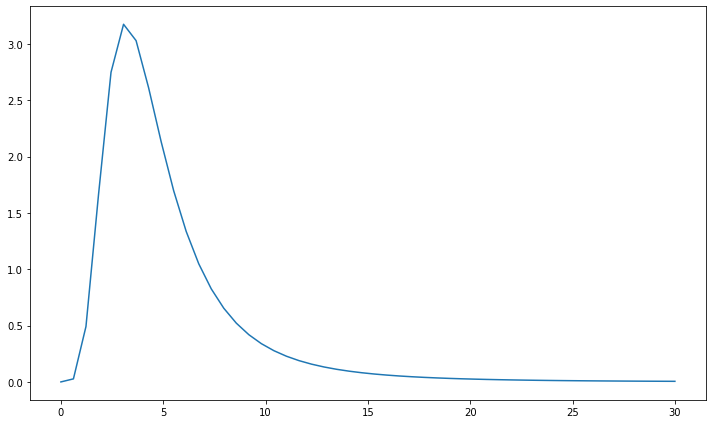

In [ ]:
#GRAFICAMOS

import matplotlib.pyplot as plt
import numpy as np

kl = np.linspace(0,30)
plt.figure(figsize = (10,6))
plt.plot( kl, list(map(f_t,list(kl))) )
plt.tight_layout()

In [ ]:
#INTEGRAMOS LA FUNCION, PRIMERO IMPORTAMOS quad DE scipy.integrate
from scipy.integrate import quad #SIRVE PARA INTEGRAR NUMERICAMENTE

In [ ]:
quad(f_t, a = 2.1, b = np.inf)[0] #a : LIMITE INFERIOR, b : LIMITE SUPERIOR (np.inf := oo+)

13.818097451740151

***Solución punto 1***

Crearemos un Data Frame que contenga 1000 observaciones de una distribución $t$-Student con 8 grados de libertad 100 veces. Después creamos otro Data Frame donde iremos verificando celda por celda del DF original y sí el valor de la celda es mayor a 2.1 (límite inferior de la integral) entonces al nuevo DF le asignamos en la misma posición el elemento del DF original elevado a la quinta potencia, en caso contrario no hacemos algún movimiento.

In [ ]:
#IMPORTAMOS LA FUNCION t DE LA DISTRIBUCION t-Student
from scipy.stats import t

In [ ]:
import pandas as pd
DF = pd.DataFrame(np.zeros((1000,100))) #CREAMOS UN DF DE CEROS CON 1000 FILAS Y 100 COLUMNAS

In [ ]:
for Columna in range (len(DF.columns)):
  DF.iloc[:,Columna] = list(t.rvs(8,size = (len(DF.index))))

In [ ]:
DF

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,-0.460867,-0.712854,-2.145303,-0.545490,-1.568284,0.657290,-0.719763,1.032786,0.578527,-2.276961,-0.883075,-1.216502,1.787105,-0.870336,-1.085640,1.618544,-0.398732,-0.586725,-1.392385,2.853820,0.895715,0.066511,1.205543,0.533933,1.234537,-2.098097,0.515950,-0.091881,-1.297311,-1.551042,-0.531637,0.901042,-1.758018,0.078190,0.640070,0.589360,-1.457330,-1.209110,0.566985,1.567464,...,2.522541,-1.368016,0.282820,-1.662507,-1.012283,0.663746,-0.528085,0.784645,-0.625824,1.383412,0.794217,-1.535886,3.826000,-0.132847,-0.105786,0.869346,0.679201,0.607973,0.640456,2.662968,-0.291494,-2.010028,0.270038,0.051897,1.040203,0.078835,-0.175014,0.925509,1.995194,0.471294,-1.023798,-0.392382,-1.348618,0.587485,-1.623651,0.866359,-1.133196,-0.075980,-0.373083,0.634931
1,0.066861,0.633798,2.276758,-0.077938,-3.095037,-1.207787,-0.508866,0.439204,-0.606764,-1.109951,0.189480,1.994064,-0.901323,-1.229562,1.269582,1.043120,1.156129,0.564824,-0.160530,-0.044215,0.086213,1.925612,0.380332,-0.646043,-1.316571,1.240753,-1.074186,-0.375526,-0.220559,0.715495,-0.278085,-1.641681,1.101971,-1.812353,-0.211155,1.367326,-0.335206,0.805658,0.265295,0.450942,...,-0.412030,-0.530277,1.053591,0.483388,0.321311,0.931837,0.707456,-0.874946,-0.184449,0.811893,-0.931086,0.920116,-2.287579,0.609474,-0.594648,0.107573,0.909192,0.561852,0.602840,-0.847218,0.819699,0.124744,-0.008123,-3.389529,0.370756,0.657221,-1.047052,1.063469,1.567045,-0.481319,-1.302296,-0.900326,-1.718400,-1.304484,-1.411247,0.491639,-3.136166,-0.439609,-0.062531,-0.178637
2,0.603661,-0.567468,-0.526118,-0.264664,-0.326129,0.491410,-1.309284,-2.794105,-0.366891,1.223457,0.962948,-0.409406,-1.443821,0.357169,-0.486100,0.603980,-0.439541,-0.557184,0.899903,-1.994527,0.961415,-1.295489,-0.695761,2.626845,0.237496,-1.368644,-0.043992,-0.627500,-1.836774,1.084818,-1.243422,-0.119161,0.908468,-0.459948,1.136925,2.093571,-0.905540,1.041612,-1.291703,0.876106,...,0.946073,1.044727,0.009610,0.579702,-0.724371,0.985819,-2.171000,-2.592674,-0.518114,-0.854507,0.070059,-1.920172,0.188867,1.445070,2.120108,1.479211,1.397793,0.439232,0.465862,0.847256,-1.434205,0.429075,0.414664,0.233004,0.112730,0.445623,-0.969411,1.544965,1.397365,-1.419957,1.229229,-0.866334,-0.225943,-0.369690,-0.638327,-0.033128,-0.930145,-1.421144,-1.204495,-0.921389
3,1.078506,0.547486,1.452936,0.301927,0.049044,0.000519,-2.258039,-0.298210,1.270537,0.759362,-0.976704,-0.305774,-0.444599,0.555036,0.277964,-1.031574,-0.002324,-0.072961,0.038532,-2.193538,1.163376,1.377842,-0.329992,0.155766,-0.985632,-0.446899,-0.586267,-1.582078,-0.158111,0.678456,-0.222086,-0.227674,-0.654787,-0.463407,0.294329,0.311178,-0.404759,-0.102523,-0.578112,0.042844,...,0.241840,-0.440921,0.665156,0.797170,1.738261,-0.514422,-1.581699,-0.017082,1.285781,0.180825,0.487432,0.790150,0.691966,1.195968,-2.899008,0.298914,0.228520,0.389571,-0.359023,0.802681,-0.480261,-1.130355,-3.415481,0.103605,-0.199313,-0.306611,0.545467,-0.003386,-0.099268,1.274283,0.364369,-0.469554,-1.932761,-1.915348,0.794284,0.324302,1.398420,0.752533,0.529861,-0.942568
4,-0.353569,-0.394221,-0.521497,0.463301,1.820163,1.411441,-0.062184,-0.083097,-2.466082,1.006460,0.880902,-1.665214,-0.168770,-0.202762,-0.010017,1.772261,-0.533751,1.726349,0.176160,0.539116,-1.908498,-0.182860,-1.376820,0.127004,2.708127,-1.705367,1.177214,0.244361,0.208288,0.292816,-2.992383,-2.882847,-0.380163,0.630589,-1.692150,1.479888,-1.286240,-3.147369,0.019319,0.145541,...,0.039340,-0.038983,-0.169573,1.105798,-0.491910,-1.633357,1.079046,0.769245,-2.485746,-0.728348,-0.413228,2.425432,-1.087445,-0.286403,-1.281331,-0.301090,0.530237,-2.679805,-0.021535,0.830986,0.175901,-5.295190,-0.786616,-0.916637,1.904774,0.302899,0.657021,-1.468135,0.072004,-1.086880,0.389677,2.443692,-1.331

In [ ]:
DF2 = pd.DataFrame(np.zeros((1000,100)))

In [ ]:
for i in range (len(DF2.index)): #VERIFICAMOS FILA X FILA
  for j in range (len(DF2.columns)): #VERIFICAMOS COLUMNA X COLUMNA
    if DF.iloc[i,j] > 2.1: #SI EL ELEMENTO DEL DF ORIGINAL ES MAYOR A 2.1
      DF2.iloc[i,j] = DF.iloc[i,j]**5 #ENTONCES AL ELEMENTO EN EL NUEVO DF EN LA POSICION i,j LE ASIGNAMOS EL DEL VIEJO ELEVADO A LA 5

In [ ]:
DF2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,189.292286,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,102.138925,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,819.83184,0.0,0.000000,0.0,0.0,0.0,0.000000,133.91508,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
1,0.0,0.0,61.176524,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,125.075509,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,42.834165,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,145.661591,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,83.935416,0.00000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,87.142896,0.0,0.0,0.0,0.0,0.0,326.413249,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,42.501203,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,167.634758
996,0.0,0.0,67.587908,0.0,0.0,0.0,48.944276,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,419.058077,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,68.237955,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
997,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,153.698643,0.0,0.0,0.0,0.0,0.0,0.000000,651.089311,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,58.086572,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.00

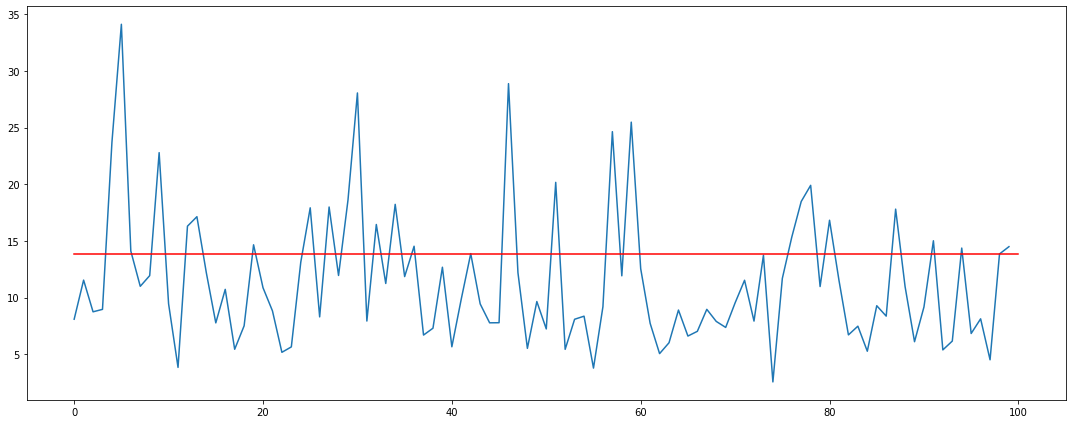

In [ ]:
from statistics import mean
Valores_t = DF2.apply(mean,axis = 0).to_frame() #LE APLICAMOS LA MEDIA A CADA COLUMNA
Valores_t.plot(kind = 'line',figsize = (15,6),legend = False) #GRAFICAMOS EL DF
#GRAFICAMOS LA LINEA DEL VALOR DE LA INTEGRAL
plt.plot([0,len(DF.columns)],[quad(f_t, a = 2.1, b = np.inf)[0],quad(f_t, a = 2.1, b = np.inf)[0]],color = 'red')
plt.tight_layout() 

In [ ]:
print('La media es',Valores_t.mean()[0],'\nLa desviacion estandar es',Valores_t.std()[0])

La media es 11.458562171607745 
La desviacion estandar es 5.902434434926764


***Solución punto 2***

In [ ]:
#EN RESUMEN, SEGUIREMOS EL MISMO PATRON QUE ANTES 
#LA DIFERENCIA SERA AL MOMENTO DE SUSTITUIR LOS VALORES EN EL NUEVO DF PUES ES
#MEDIANTE LA TECNICA DE MUESTREO POR IMPORTANCIA PARA CAUCHY

from scipy.stats import cauchy
from scipy.stats import t

#DATAFRAME DE CEROS
MC0 = pd.DataFrame(np.zeros((1000,100)))

#DATAFRAME CON VALORES DE CAUCHY
for Columna2 in range (len(MC0.columns)):
  MC0.iloc[:,Columna2] = list(cauchy.rvs(size = (len(MC0.index))))

#NUEVO DF
MC = pd.DataFrame(np.zeros((1000,100)))

for i2 in range (len(MC0.index)): #VERIFICAMOS FILA X FILA
  for j2 in range (len(MC0.columns)): #VERIFICAMOS COLUMNA X COLUMNA
    if MC0.iloc[i2,j2] > 2.1: #SI EL ELEMENTO DEL DF ORIGINAL ES MAYOR A 2.1
      MC.iloc[i2,j2] = ((MC0.iloc[i2,j2]**5)*t.pdf(MC0.iloc[i2,j2],8))/cauchy.pdf(MC0.iloc[i2,j2]) 

In [ ]:
MC

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,0.000000,0.0,0.0,0.000000,0.000000,0.0,126.048791,0.000000,0.000000,0.000000,0.000000,0.000000,101.831637,0.000000,0.000000,0.000000,0.000000,0.0,100.962588,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,129.096298,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.000000,145.286863,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,38.014927,0.0,49.974953,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,45.898426,0.000000,0.000000,0.000000,0.000000,0.0,21.430439,106.431052,0.000000,0.000000,0.000000,27.468797,0.000000
1,0.000000,0.0,0.0,0.000000,156.692777,0.0,0.000000,0.000000,0.000000,0.000000,133.932859,0.000000,0.000000,0.000000,0.000000,41.342044,0.000000,0.0,0.000000,0.0,0.000000,61.228883,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,162.576137,0.0,0.00000,0.000000,0.000000,0.0,139.868740,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,150.228639,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,168.093456,0.000000,0.000000,0.000000,0.000000,0.000000
2,72.918483,0.0,0.0,0.000000,167.954292,0.0,0.000000,0.000000,0.000000,102.339465,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,163.984849,0.0,0.0,0.0,0.000000,0.000000,0.000000,75.361015,0.000000,0.0,0.00000,2.387845,0.000000,0.0,0.000000,34.702475,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,64.00658,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.339286,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,147.994188,0.000000,6.498034,10.541971,0.000000,0.000000,0.000000
3,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.590611,0.000000,0.000000,45.286486,0.000000,0.000000,0.0,0.000000,0.0,0.000000,133.121461,0.000000,0.0,88.951202,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,42.631418,0.000000,0.0,0.000000,0.000000,...,55.595586,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,164.906440,0.00000,0.000000,59.369233,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.0,0.0,43.612435,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,157.840826,0.000000,0.0,0.000000,0.0,138.579808,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,111.20834,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,100.444689,74.503157,0.0,0.0,125.494212,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,107.928273,0.0,168.079042,47.448832,132.198630,0.000000,0.000000,0.000000,0.000000,43.309759,139.778820,0.000000,0.0,167.942973,50.611506,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,165.231422,0.000000,0.000000,0.0,0.000000,0.0,27.305384,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,

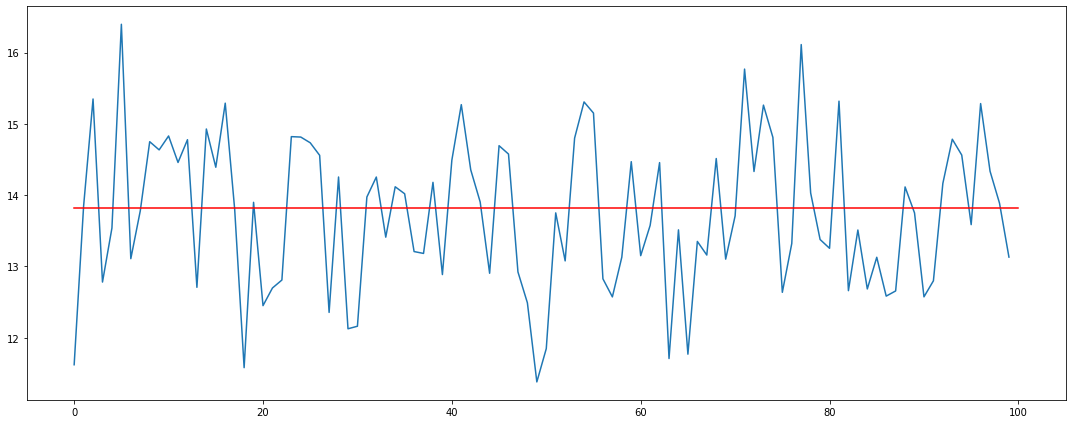

In [ ]:
#GRAFICAMOS
Valores_Cauchy = MC.apply(mean,axis = 0).to_frame()
Valores_Cauchy.plot(legend = False,figsize = (15,6))
plt.plot([0,len(DF.columns)],[quad(f_t, a = 2.1, b = np.inf)[0],quad(f_t, a = 2.1, b = np.inf)[0]],color = 'red')
plt.tight_layout()

In [ ]:
print('La media es',Valores_Cauchy.mean()[0],'\nLa desviacion estandar es',Valores_Cauchy.std()[0])

La media es 13.738987485220303 
La desviacion estandar es 1.0743550057598887


In [ ]:
#EN RESUMEN, SEGUIREMOS EL MISMO PATRON QUE ANTES 
#LA DIFERENCIA SERA AL MOMENTO DE SUSTITUIR LOS VALORES EN EL NUEVO DF PUES ES
#MEDIANTE LA TECNICA DE MUESTREO POR IMPORTANCIA PARA NORMAL

from scipy.stats import norm

#DATAFRAME DE CEROS
MN0 = pd.DataFrame(np.zeros((1000,100)))

#DATAFRAME CON VALORES DE CAUCHY
for Columna3 in range (len(MN0.columns)):
  MN0.iloc[:,Columna3] = list(norm.rvs(size = (len(MN0.index))))

#NUEVO DF
MN = pd.DataFrame(np.zeros((1000,100)))

for i3 in range (len(MN0.index)): #VERIFICAMOS FILA X FILA
  for j3 in range (len(MN0.columns)): #VERIFICAMOS COLUMNA X COLUMNA
    if MN0.iloc[i3,j3] > 2.1: #SI EL ELEMENTO DEL DF ORIGINAL ES MAYOR A 2.1
      MN.iloc[i3,j3] = ((MN0.iloc[i3,j3]**5)*t.pdf(MN0.iloc[i3,j3],8))/norm.pdf(MN0.iloc[i3,j3]) 

In [ ]:
MN

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,52.616941,0.0,0.000000,0.0,0.0,...,434.609797,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,76.240218,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,65.021835,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,99.997837,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,76.737799,0.0,0.0,0.0,99.469759,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,257.056159,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,534.947218,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,132.157624,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,357.243504,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,168.058413,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,386.937616,0.00000,0.0,0.0,0.0,60.947363,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,115.861033,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,237.52872,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0

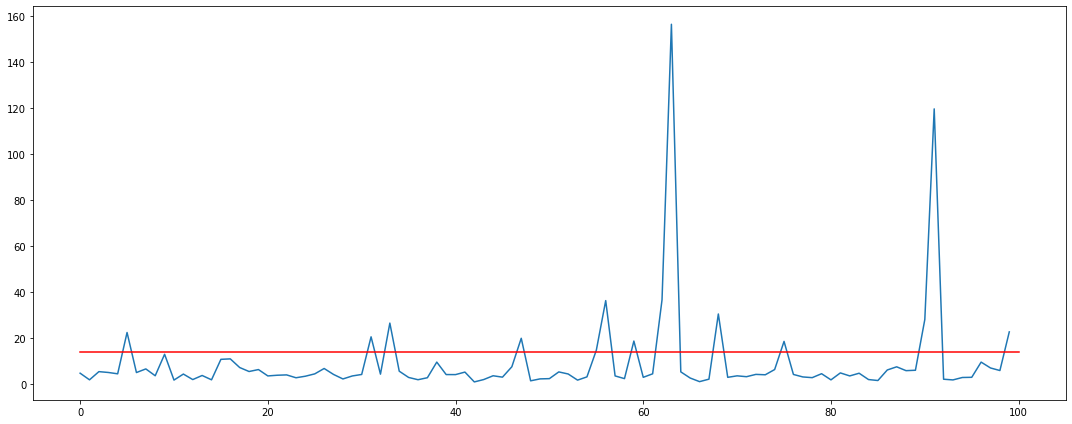

In [ ]:
#GRAFICAMOS
Valores_Normal = MN.apply(mean,axis = 0).to_frame()
Valores_Normal.plot(legend = False,figsize = (15,6))
plt.plot([0,len(DF.columns)],[quad(f_t, a = 2.1, b = np.inf)[0],quad(f_t, a = 2.1, b = np.inf)[0]],color = 'red')
plt.tight_layout()

In [ ]:
#COMPARAMOS CADA UNA DE LAS DENSIDADES
#CONCATENAMOS LOS DF
Valores_Densidades = pd.concat([Valores_t,Valores_Cauchy],axis = 1)
Valores_Densidades = pd.concat([Valores_Densidades,Valores_Normal],axis = 1)
Valores_Densidades.columns = ['t','Cauchy','Normal']

In [ ]:
Valores_Densidades

,t,Cauchy,Normal
0,8.082475,11.622180,4.814392
1,11.536633,13.846229,1.937050
2,8.736849,15.349123,5.491620
3,8.952612,12.781636,5.130169
4,23.703896,13.539244,4.544902
...,...,...,...
95,6.821937,13.587087,3.030150
96,8.117682,15.284822,9.623620
97,4.499153,14.335678,7.080351
98,13.846757,13.888371,5.973842


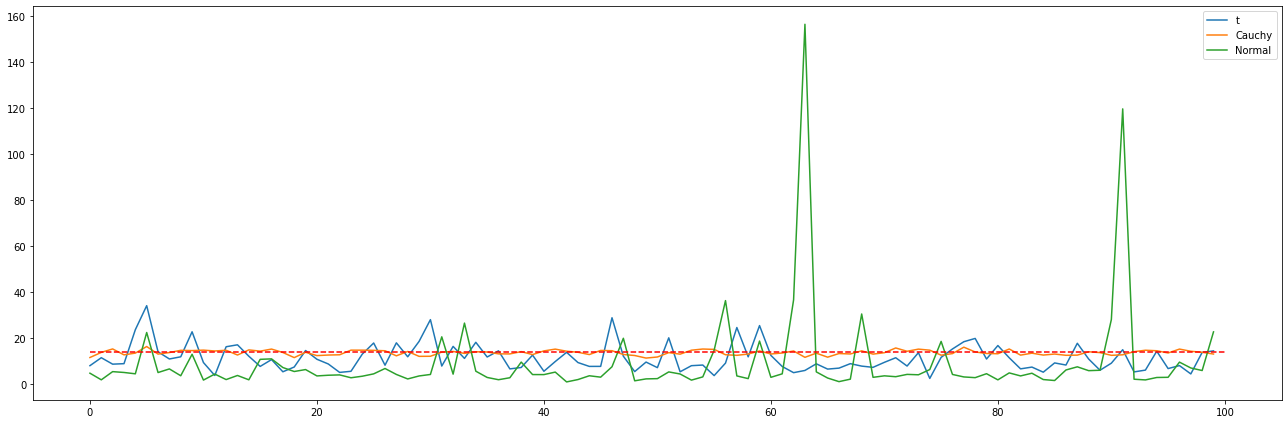

In [ ]:
Valores_Densidades.plot(figsize = (18,6))
plt.plot([0,len(DF.columns)],[quad(f_t, a = 2.1, b = np.inf)[0],quad(f_t, a = 2.1, b = np.inf)[0]],color = 'red',linestyle = '--')
plt.tight_layout()

In [ ]:
Valores_Densidades.describe().loc[['mean','std']]

,t,Cauchy,Normal
mean,11.458562,13.738987,9.437616
std,5.902434,1.074355,20.035078


Podemos visualizar que el mejor comportamiento lo tiene una distribución Cauchy pues su varianza es la más cercana al 0.

## Reducción de varianza mediante condicionamiento

Recordemos la fórmula de la varianza condicional

$$Var(X) = E\left[Var\left(X|Y\right)\right] + Var\left(E\left[X|Y\right]\right)$$

Como los dos términos de la derecha son no negativos, pues una varianza siempre es no negativa, vemos que

$$Var(X) \geq Var\left(E\left[X|Y\right]\right)$$

Ahora suponga que estamos interesados en realizar un estudio de simulación para verificar el valor de $\theta = E[X]$, donde $X$ es una variable de salida de una ejecución de simulación.

Además, suponga que hay otra variable $Y$, tal que $E[X|Y]$ es conocido y toma un valor que se puede determinar a partir de la ejecución de simulación.

Como 

$$E[E[X|Y]] = E[X] = \theta$$

Esto implica que $E[X|Y]$ es también un estimador insesgado de $\theta$.

Gracias a que

$$Var(X) \geq Var\left(E\left[X|Y\right]\right)$$

Entonces $E[X|Y]$ es superior al estimador en bruto de $X$ pues su varianza es menor.

En este momento podríamos intentar otras mejoras mediante algún estimador.

Un estimador del tipo $\alpha^*$, donde

$$a^* = \frac{Var(E[X|Y])-Cov(X,E[X|Y])}{Var(X)+Var(E[X|Y])-2Cov(X,E[X|Y])}$$

Ahora mostraremos que $a^* = 0$ y que la combinación de los estimadores $X$ y $E[X|Y]$ no mejora lo que se obtiene si se emplea solamente $E[X|Y]$.

Observe que

$$Var(E[X|Y]) = E\left[E[X|Y]^2\right] - \left(E\left[E[X|Y]\right]\right)^2$$

$$\implies Var(E[X|Y]) = E\left[E[X|Y]^2\right] - \left(E[X]\right)^2$$

Veamos sí $Var(E[X|Y]) = Cov(X,E[X|Y])$

Note que

$$Cov(X,E[X|Y]) = E[X\cdot E[X|Y]] - E(X)\cdot E[E[X|Y]]$$

$$\implies Cov(X,E[X|Y]) = E[X\cdot E[X|Y]] - \left(E[X]\right)^2 = E[(E[X|Y]^2) - (E[X])^2] = Var(E[X|Y])$$



Podemos ver entonces que combinando los estimadores de $X$ y $E[X|Y]$ no se logra una reducción de varianza adicional.

**EJEMPLO**

Reconsideremos el uso de la simulación para estimar $\pi$.

Una forma de estimar el valor de $\pi$ es determinar la frecuencia con la cual un punto elegido al azar en el cuadrado de área 4 con centro en el origen cae dentro del círculo inscrito de radio 1.

Específicamente sí $V_i = U_i$ donde $i = 1,2$ para el cual $U_i$ es un número aleatorio distribuido uniformemente entre -1 y 1, y sea

$$I= \left\{ \begin{array}{lcc}
             1 &   si  & V_1^2 + V_2^2 \leq 1 \\
             \\ 0 & & \text{Caso contrario}
             \end{array}
   \right.$$

Entonces $E[I] = \frac{\pi}{4}$.

Lo anterior se deduce pues

$$E[I] = P\left\{V_1^2+V_2^2\leq 1\right\} = \frac{\text{Área del círculo}}{\text{Área del cuadrado}} = \frac{\pi \cdot (1)^2}{4} = \frac{\pi}{4}$$

Mostraremos que el uso promedio de valores sucesivos de $I$ para estimar $\frac{\pi}{4}$ se puede mejorar utilizando $E[I|V_i]$ en vez de $I$.

Notemos que

$$E[I|V_1 = v] = P\left\{V_1^2+V_2^2\leq 1|V_1 = v\right\}$$

$$\implies E[I|V_1 = v] = P\left\{v^2 +V_2^2\leq 1 \right\}$$

$$\implies E[I|V_1 = v] = P\left\{V_2^2 \leq 1-v^2\right\}$$

$$\implies E[I|V_1 = v] = P\left\{-\sqrt{1-v^2}\leq V_2 \leq \sqrt{1-v^2}\right\}$$

$$\implies E[I|V_1 = v] = \int_{-\sqrt{1-v^2}}^{ \sqrt{1-v^2} }V_2\cdot dx$$

Como $V_2$ es una variable aleatoria distribuida uniformemente entre -1 y 1 tenemos que su media es $\frac{1}{2}$.

Por lo cual

$$E[I|V_1 = v] = \sqrt{1-v^2}$$

De modo que el estimador $\sqrt{1-v^2}$ también tiene media $\frac{\pi}{4}$ y menor varianza que $I$.

$$E\left[\sqrt{1-v^2} \right] = \frac{1}{2}\int_{-1}^{1}\sqrt{1-x^2}dx = \int_0^1\sqrt{1-x^2}dx = \sqrt{E(1-U^2)}$$

Podemos simplificar un poco utilizando el estimador $\sqrt{1-U^2}$ donde $U$ es un número aleatorio.

$$Var\left[\sqrt{1-U^2}\right] = E[1-U^2]-\left(E\left[\sqrt{1-U^2}\right]\right)^2 = E[1-U^2]-\left(\frac{\pi}{4}\right)^2$$

$$\implies Var\left[\sqrt{1-U^2}\right] = \int_0^1(1-x^2)dx - \left(\frac{\pi}{4}\right)^2 = \frac{2^5-3\pi^2}{3\cdot 2^4}$$

# Técnicas de validación estadística

## Pruebas de bondad de ajuste

Las pruebas de bondad de ajuste son útiles para saber si una distribución de probabilidad supuesta es congruente con un conjunto de datos.

Con frecuencia, uno comienza un análisis probabilístico de un fenómeno dado estableciendo como hipótesis que algunos de sus elementos aleatorios tienen una distribución de probabilidad particuarl. Por ejemplo, podríamos iniciar el análisis de una red de tráfico suponiendo que el número diario de accidentes tiene una distribución de Poisson.

Para verificar tales hipótesis en forma estadística se observan los datos y se decide después si la hipótesis de una distribución de probabilidad particular es congruente con los mismos. Estas pruebas estadísticas se llaman **pruebas de bondad de ajuste**.

Una forma de realizar una prueba de bondad de ajuste es separar primero los valores posibles de una cantidad aleatoria en un número finito de regiones. Luego se observa una muestra de valores de esta cantidad y se compara entre el número de ellos que caen en cada una de las regiones y los números teóricos esperados cuando la distribución de probabilidad especificada realmente controla los datos.

### Prueba de bondad de ajuste Chi-Cuadrado para datos discretos

Suponga que vamos a observar $n$ variables aleatorias independientes $Y_1,\ldots,Y_n$, cada una de las cueles toma uno de los valores $1,\ldots,k$ y que estamos interesados en verificar la hipótesis de que $\{p_i : i = 1,\ldots,k\}$ es la función de masa de probabilidad de estas variables aleatorias.

Es decir, si $Y$ representa cualesquiera de las $Y_j$, la hipótesis por verificar, que denotamos por $H_0$ es

$$H_0 : P\{Y = i\} = p_i, i=1,\ldots, k$$

Para verificar la hipótesis anterior, sea $N_i, i = 1,\ldots,k$, el número de $Y_j$ que son iguales a $i$.

Como cada $Y_j$ es igual a $i$ de manera independiente con probabilidad $P\{Y = i\}$, se tiene que, según $H_0$, $N_i$, es binomial con parámetros $n$ y $p_i$. Por lo tanto, cuando $H_0$ es verdadera

$$E[N_i] = n\cdot p_i$$

De modo que $\left(N_i,-np_i\right)^2$ es un indicador de la probabilidad de que $p_i$ sea igual a la probabilidad de que $Y = i$. Cuando esto es grande en relación con $np_i$, nos indica que $H_0$ no es verdadera.

De hecho, tal razonamiento nos conduce a considerar la cantidad 

$$T = \sum_{i=1^k}\frac{(N_i-np_i)^2}{np_i}$$

y rechazar la hipótesis nula cuando $T$ es grande.

Mientras los valores pequeños de la cantidad de prueba $T$ son una evidencia en favor de la hipótesis $H_0$, los valores grandes indican su falsedad.

Suponga que los datos verdaderos hacen que la cantidad de prueba $T$ asuma el valor $t$. Para ver lo poco probable que sería un resultado grande si la hipótesis nula fuese verdadera, definimos el valor $p$, como

$$p-value = P_{H_0}\{T\geq t\}$$

Donde $P_{H_0}$ indica que la probabilidad debe calcularse según la hipótesis de que $H_0$ es verdadera. Por lo tanto, el valor $p$ proporciona la probabilidad de que ocurra un valor grande de $T$, como el observado, si la hipótesis nula fuese verdadera.

Es usual rechazar la hipótesis nula diciendo que parece no ser congruente con los datos, cuando se obtiene un valor de $p$ pequeño (por lo general menor a 0.05) y, en caso contrario, no rechazar la hipótesis nula, afirmando que parece ser congruente con los datos.

Después de observar el valor (digamos $t$) de la cantidad de prueba, solo falta determinar la probabilidad de $p-value$.

Una aproximación razonablemente buena de esta probabilidad se puede obtener mediante el resultado clásico de que, para valores grande de $n$, $T$ tiene aproximadamente una distribución ji-cuadrada con $k-l$ grados de libertad cuando la $H_0$ es verdadera.

Por lo tanto

$$p-value \approx P\{\chi^2_{j-1}\leq t \}$$

Donde $\chi^2_{j-1}$ es una variable aleatoria ji-cuadrada con $k-1$ grados de libertad.


**EJEMPLO**

Se registraron 100 observaciones entre 0 y 1 igualmente probables, las cuales se agruparon en cinco intervalos como indica la siguiente tabla.

|$$A_i$$|$$N_i$$|
|--|--|
|$$(0,0.2]$$|15|
|$$(0.2,0.4]$$|22|
|$$(0.4,0.6]$$|25|
|$$(0.6,0.8]$$|30|
|$$(0.8,1]$$|8|

Se desea probar la siguiente hipótesis.

$$H_0 : F(x) = F_0(x)$$
$$H_1 : F(x) \neq F_0(x)$$

donde $F_0(x)$ es la distribución de una variable aleatoria uniforme $U(0,1)$

Recordemos que la región de rechazo es $p-value<\alpha$.

Notemos que tenemos $n=100$ observaciones y como queremos compararlo con una distribución uniforme entonces $p_i = \frac{1}{5},i=1,2,3,4,5$.

Entonces la frecuencia esperada es $np_i=20,i=1,2,3,4,5$.

|$$A_i$$|$$N_i$$|$$np_i$$|
|--|--|--|
|$$(0,0.2]$$|15|20|
|$$(0.2,0.4]$$|22|20|
|$$(0.4,0.6]$$|25|20|
|$$(0.6,0.8]$$|30|20|
|$$(0.8,1]$$|8|20|

In [ ]:
#USAMOS LA LIBRERIA Scipy PARA REALIZAR LA PRUEBA DE LA JI CUADRADA
from scipy.stats import chisquare

In [ ]:
#f_obs : FRECUENCIA OBSERVADA, f_exp : FRECUENCIA ESPERADA
chisquare(f_obs=[15,22,25,30,8],f_exp=[20,20,20,20,20])

Power_divergenceResult(statistic=14.9, pvalue=0.004913181623037236)

In [ ]:
#VEAMOS SI RECHAZAMOS LA H0
chisquare(f_obs=[15,22,25,30,8],f_exp=[20,20,20,20,20])[1]<0.05

True

Por lo tanto estas 100 observaciones no siguen una distribución $U(0,1)$

### Contrastes de Kolmogorov-Smirnov

La herramienta clave en estos contrastes es la función de distribución empírica $F_n^*(x)$, obtenida a partir de la muestra $(U_1,\ldots,U_n)$, una vez ordenada $U_{1_n}\leq \ldots \leq U_{n_n}$ se define

$$
F_n^*(x)= \left\{ \begin{array}{lcc}
             0 &   si  & x\leq U_{1_n} \\
             \\ \frac{k}{n} &  si & U_{k_n}\leq x < U_{k+1_n}, k = 1,\ldots, n-1 \\
             \\ 1 &  si  & x \geq U_{n_n}
             \end{array}
   \right.
$$



El teorema de Glivenko-Cantelli establece que la función de distribución empírica converge uniformemente, casi seguro, a la función de distribución de la población de la que se extrae la muestra.

Tomando como base este resultado, el contraste de Kolmogorov-Smirnov utiliza estadísticos que evalúan el grado de alejamiento entre la función de distribución bajo la hipótesis nula y la función de distribución empírica, construida a partir de los datos.

**Esta prueba solo puede aplicar a distribuciones continuas**

Para ejemplificar, se puede utilizar el ajuste a una distribución $U(0,1)$.

Para el contraste bilateral, se utiliza el estadístico

$$D_n = \underset{x}{\sup}|F_n^*(x)-F_0(x)|$$

Que se calcula a partir de los estadísticos de contraste unilaterales con

$$H_0 : F(x)\leq F_0(x)$$
$$H_1 : F(x)> F_0(x)$$

Respectivamente

$$D_n^+ = \underset{x}{\sup}[F_n^*(x)-F_0(x)] = \max \left\{0,\underset{1\leq i\leq n}{\max}\left(\frac{i}{n}-U_{i_n}\right)\right\}$$

$$D_n^- = \underset{x}{\sup}[F_n^*(x)-F_0(x)] = \max \left\{0,\underset{1\leq i\leq n}{\max}\left(U_{i_n}-\frac{i-1}{n}\right)\right\}$$

Entonces

$$D_n = \max \{D_n^+,D_n^-\}$$

Se rechaza $H_0$ para valores grandes del estadístico a nivel $\alpha$ si

$$D_n > D_{n,\alpha}$$

Otra forma de rechazar $H_0$ es

$$p-value < \alpha$$

**EJEMPLO**

Dada la siguiente muestra de 10 observaciones 

* $0.14, 0.92, 0.16, 0.83, 0.42, 0.28, 0.37, 0.55, 0.99, 0.87$

Se quiere contrastar la bondad de ajuste a una uniforme $U(0,1)$. Utilizando $\alpha = 0.20$.

In [ ]:
#USAMOS LA LIBRERIA Scipy PARA REALIZAR LA PRUEBA DE LA KS
from scipy.stats import kstest

In [ ]:
#NOTA : EL NOMBRE DE LA DISTRIBUCION A COMPARAR DEBE IR ESCRITO COMO ESTA DADO
#EN LA PAGINA DE scipy.stats
kstest([0.14,0.92,0.16,0.83,0.42,0.28,0.37,0.55,0.99,0.87],'uniform')

KstestResult(statistic=0.22999999999999998, pvalue=0.5885983746197226)

In [ ]:
#MEDIANTE EL P-VALUE PODEMOS VER SI RECHAZAMOS LA HIPOTESIS NULA
kstest([0.14,0.92,0.16,0.83,0.42,0.28,0.37,0.55,0.99,0.87],'uniform')[1] < 0.2

False

La siguiente página redirigue a una tabla para ver los valores de $D_{n,\alpha}$ para la prueba de Kolmogorov-Smirnov

[Tabla contingencia KS][1]

[1]: http://www4.ujaen.es/~mpfrias/TablasInferencia.pdf

Notemos que $n = 10, \alpha = 0.2 \implies D_{10,0.2}= 0.32260$

In [ ]:
#MEDIANTE LA TABLA DE CONTINGENCIA VERIFICAMOS SI RECHAZAMOS LA HIPOTESIS NULA
kstest([0.14,0.92,0.16,0.83,0.42,0.28,0.37,0.55,0.99,0.87],'uniform')[0] > 0.32260

False

### Contrastes de aleatoreidad e independencia

Se contrastará si hay dependencia entre las observaciones según se van obteniendo y si la evolución del proceso puede considerarse realmente aleatoria y no predecible.

Por tanto, si $U_1,\ldots, U_n$ son números pseudoaleatorios se puede enunciar la hipótesis nula como

* $H_0$ : Las observaciones no siguen algún patrón

* $H_0$ : Las observaciones son independientes

* $H_0$ : Las observaciones son aleatorias

#### Contraste de las rachas (RUNS)

Se quiere evaluar, si de alguna manera, los números pseudoaleatorios aparecen en amplios bloques de valores grandes, medianos o pequeños, o si por el contrario, hay demasiada alternancia de valores.

Lo primero es fijar y cuantificar lo que se considera una racha, para después rechazar los casos de muchas o muy pocas rachas.

Sean $(U_1,\ldots,U_n)$ una sucesión de variables aleatorias independientes e idénticamente distribuidas según una $U(0,1)$. Se determina una sucesión con $n-1$ signos $(+)$ y $(-)$ de manera que

* Sí $U_i\leq U_{i+1}$ se asigna $(+)$

* Sí $U_i > U_{i+1}$ se asigna $(-)$

Se denominará 

* $R_+$ : Número de rachas de $(+)$ y $n_1$ número de signos positivos

* $R_-$ : Número de rachas de $(-)$ y $n_2$ número de signos negativos

* $R = R_+ + R_-$, donde $R$ representará el número de cambio de signo 

Como los casos extremos corresponden a valores pequeños y grandes de $R$, la región crítica debe ser

$$RC = \{R<c_1,R>c_2\}$$

Donde $c_1,c_2$ son tales que

$$P_{H_0}\{RC\} = \frac{\alpha}{2}$$

Para muestras grandes la media y la varianza de $R$, con $m = n_1+n_2$ se obtienen mediante las siguientes expresiones

$$E[R] = 1 + \frac{2n_1n_2}{m}$$

$$Var[R] = \frac{2n_1n_2(2n_1n_2-m)}{m^2(m-1)}$$

Si se construye el estadístico

$$Z = \frac{Z-\left(1+\frac{2n_1n_2}{m}\right)}{\sqrt{\frac{2n_1n_2(2n_1n_2-m)}{m^2(m-1)}}}$$

Y aplicando el Teorema del Límite Central, se llaga que bajo $H_0$ y para $m = n_1+n_2$ suficientemente grande $(n_1,n_2 > 12)$, el estadístico $Z$ se distribuye como una normal estándar, es decir

$$Z \approx N(0,1), n\to \infty$$

Y aplicando corrección por continuidad para este estadístico se tiene

$$Z = \frac{R + 0.5 - \left(1+\frac{2n_1n_2}{m}\right)}{\sqrt{\frac{2n_1n_2(2n_1n_2-m)}{m^2(m-1)}}}$$